In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv("DATA-FINAL.csv",usecols=[3,4,5,6,7,8,16,18,9])
print("Head:", df.head())
print("Tail:", df.tail())
print(df)

Head:   Grade  CA_100  ...  ScholarType  Gender
0     O    87.0  ...      Hostler  Female
1    A+    87.0  ...      Hostler  Female
2    B+    84.0  ...      Hostler  Female
3    A+     NaN  ...      Hostler  Female
4    A+    87.0  ...      Hostler  Female

[5 rows x 9 columns]
Tail:       Grade  CA_100  ...  ScholarType  Gender
65530     E    79.0  ...  Day Scholar  Female
65531     A    84.0  ...  Day Scholar  Female
65532    B+    69.0  ...  Day Scholar  Female
65533    A+    91.0  ...  Day Scholar  Female
65534     B    77.0  ...  Day Scholar  Female

[5 rows x 9 columns]
      Grade  CA_100  ...  ScholarType  Gender
0         O    87.0  ...      Hostler  Female
1        A+    87.0  ...      Hostler  Female
2        B+    84.0  ...      Hostler  Female
3        A+     NaN  ...      Hostler  Female
4        A+    87.0  ...      Hostler  Female
...     ...     ...  ...          ...     ...
65530     E    79.0  ...  Day Scholar  Female
65531     A    84.0  ...  Day Scholar  Female
65

In [19]:
#df with Bachelor of Science (Honours) (Physics) course
df=df[df['MHRDName'] == "Bachelor of Science (Honours) (Physics)"]
print(df)

      Grade  CA_100  ...  ScholarType  Gender
5876      A    78.0  ...      Hostler  Female
5877     B+    59.0  ...      Hostler  Female
5878      E    82.0  ...      Hostler  Female
6844     B+    70.0  ...  Day Scholar    Male
6845      A    67.0  ...  Day Scholar    Male
...     ...     ...  ...          ...     ...
63151    A+    91.0  ...      Hostler    Male
63152     A    81.0  ...      Hostler    Male
65342    A+    86.0  ...  Day Scholar  Female
65343    A+    89.0  ...  Day Scholar  Female
65344     O    96.0  ...  Day Scholar  Female

[104 rows x 9 columns]


In [0]:
#mapping grade into numerical value
grade_map={'O':1,'A+':2,'A':3,'B+':4,'B':5,'C':6,'D':7,'PASS':8,'E':9,'F':10,'FAIL':10,'R':11,'ReApp':11,'I':12,'M':13,'S':14}
#print(grade_map)
df['Grade']=df['Grade'].map(grade_map)



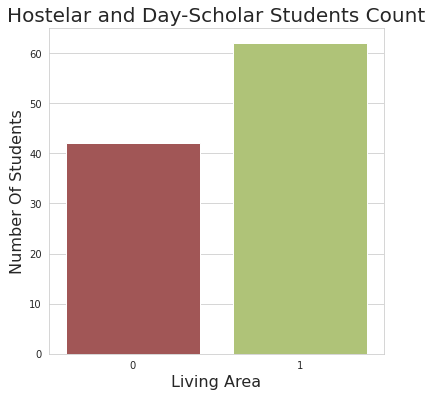

In [31]:
# ScholarType: Hostelar vs. Day-Scholar

plt.figure(figsize=(6,6))
sns.countplot(df.ScholarType, palette='tab20b_r')
plt.title('Hostelar and Day-Scholar Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()



In [30]:
#mapping of gender and scholar type
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ScholarType']=le.fit_transform(df['ScholarType'].values)
df['Gender']=le.fit_transform(df['Gender'].values)
print(df['ScholarType'].unique())
print(df['Gender'].unique())

[1 0]
[0 1]


In [22]:
# look for missing values
print(df.isnull().any())
#imputer to preprocess data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
imr=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imr=imr.fit(df.iloc[:,1:6])
df.iloc[:,1:6]=imr.transform(df.iloc[:,1:6].values)
imr=imr.fit(df.iloc[:,7:9])
df.iloc[:,7:9]=imr.transform(df.iloc[:,7:9].values)
print(df)
print(df.isnull().any())



Grade          False
CA_100         False
MTT_50          True
ETT_100         True
ETP_100         True
Course_Att      True
MHRDName       False
ScholarType    False
Gender         False
dtype: bool
       Grade  CA_100  ...  ScholarType  Gender
5876       3    78.0  ...            1       0
5877       4    59.0  ...            1       0
5878       9    82.0  ...            1       0
6844       4    70.0  ...            0       1
6845       3    67.0  ...            0       1
...      ...     ...  ...          ...     ...
63151      2    91.0  ...            1       1
63152      3    81.0  ...            1       1
65342      2    86.0  ...            0       0
65343      2    89.0  ...            0       0
65344      1    96.0  ...            0       0

[104 rows x 9 columns]
Grade          False
CA_100         False
MTT_50         False
ETT_100        False
ETP_100        False
Course_Att     False
MHRDName       False
ScholarType    False
Gender         False
dtype: bool


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [0]:
# converting difficulty level of course to categorical variable into easy, med and hard
df['difficulty'] = 'na'
df.loc[(df.Grade >= 1) & (df.Grade <= 4), 'difficulty'] = 'easy' 
df.loc[(df.Grade >= 5) & (df.Grade <= 9), 'difficulty'] = 'med' 
df.loc[(df.Grade >= 10) & (df.Grade <= 14), 'difficulty'] = 'hard'

Text(0, 0.5, 'Number of Student')

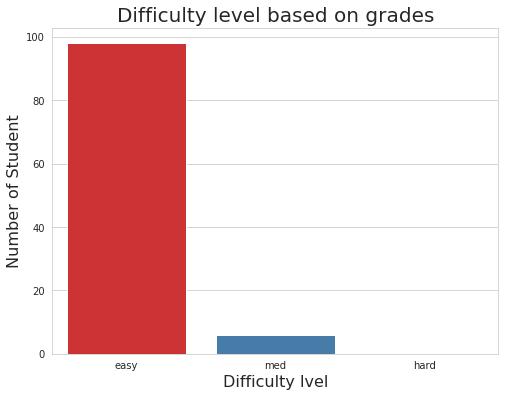

In [26]:
# difficulty level Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.difficulty, order=["easy","med","hard"], palette='Set1')
plt.title('Difficulty level based on grades',fontsize=20)
plt.xlabel('Difficulty lvel', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

In [27]:


#mapping difficulty level into numerical value


difficulty_map={'easy':1,'med':2,'hard':3}
df['difficulty']=df['difficulty'].map(difficulty_map)
print(df)

       Grade  CA_100  MTT_50  ...  ScholarType  Gender  difficulty
5876       3    78.0    18.0  ...            1       0           1
5877       4    59.0    18.0  ...            1       0           1
5878       9    82.0    18.0  ...            1       0           2
6844       4    70.0    30.0  ...            0       1           1
6845       3    67.0    18.0  ...            0       1           1
...      ...     ...     ...  ...          ...     ...         ...
63151      2    91.0    29.0  ...            1       1           1
63152      3    81.0    34.0  ...            1       1           1
65342      2    86.0    18.0  ...            0       0           1
65343      2    89.0    18.0  ...            0       0           1
65344      1    96.0    18.0  ...            0       0           1

[104 rows x 10 columns]


In [13]:
new_df = df.copy()
new_df = new_df.drop(['MHRDName'], axis=1)
print(new_df)

       Grade  CA_100  MTT_50  ...  ScholarType  Gender  difficulty
5876       3    78.0    18.0  ...            1       0           1
5877       4    59.0    18.0  ...            1       0           1
5878       9    82.0    18.0  ...            1       0           2
6844       4    70.0    30.0  ...            0       1           1
6845       3    67.0    18.0  ...            0       1           1
...      ...     ...     ...  ...          ...     ...         ...
63151      2    91.0    29.0  ...            1       1           1
63152      3    81.0    34.0  ...            1       1           1
65342      2    86.0    18.0  ...            0       0           1
65343      2    89.0    18.0  ...            0       0           1
65344      1    96.0    18.0  ...            0       0           1

[104 rows x 9 columns]


Text(0.5, 1.0, 'Correlation Heatmap')

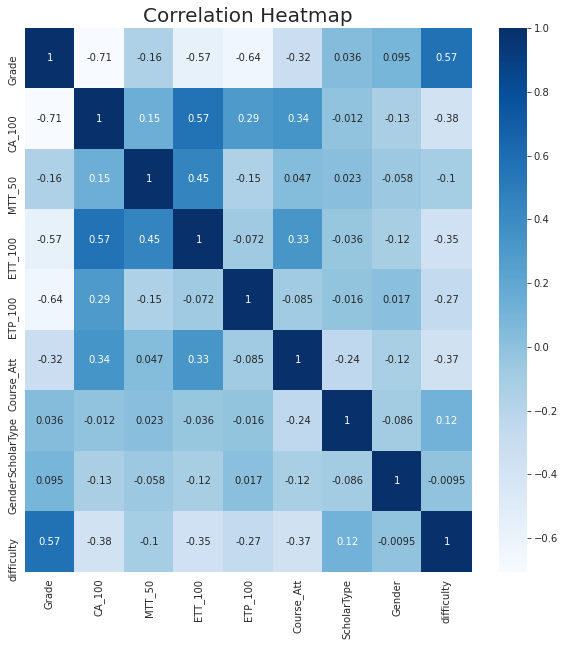

In [28]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

In [0]:
# difficulty level Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.difficulty, order=["easy","med","hard"], palette='Set1')
plt.title('Difficulty level based on attendence',fontsize=20)
plt.xlabel('Difficulty level', fontsize=16)
plt.ylabel('Attendence', fontsize=16)

In [0]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = new_df.drop('difficulty',axis=1)
y = new_df.difficulty
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [15]:
#classification 
#SVM
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.9583333333333334 , Cross Validation Score : 0.90625


In [0]:
#ada boost classification
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.9416665021615966 , Cross Validation Score : 0.9426097369996775


In [0]:
#Stochastic Gradient Descent Classification
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(X_train, y_train)
print("Stochastic Gradient Descent Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Stochastic Gradient Descent Model Score : 0.9408571372169691 , Cross Validation Score : 0.9425636773985537


In [0]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
ne=[]
for i in range(1,70):
    forest = RandomForestClassifier(n_estimators=60, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()
forest = RandomForestClassifier(n_estimators=20, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 1.0 , Cross Validation Score : 0.9997236423932568


In [0]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,104):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()
tree = DecisionTreeClassifier(min_samples_leaf=54)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 1.0 , Cross Validation Score : 1.0
